## **SPOTIFY.CSV**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Imports essential libraries for data handling, numerical operations, and visualizations.*

In [46]:
df = pd.read_csv("spotify.csv")

*Loads the Spotify dataset into a DataFrame so it can be analyzed and visualized.*

In [47]:
df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


*The .head() function provides a quick preview of the first five records in the dataset.*

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

*This command displays the dataset’s structure, including column names, data types, and non-null counts. It helps assess data quality and identify missing or incorrectly formatted values early in the analysis.*

In [60]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

df.info()

Shape: (8582, 18)

Missing values:
 track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_id                 0
album_name               0
album_release_date       0
album_total_tracks       0
album_type               0
track_duration_min       0
year                     0
date                     0
album_release_year       0
dtype: int64

Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   track_id            8582 non-null   object        
 1   track_name          8582 non-null   object        
 2   track_number        8582 non-null   int64         
 3   track_popularity    8582 non-null   int64         
 4   ex

*This block gives a quick summary of dataset dimensions, missing values, and duplicated rows. It helps evaluate the cleanliness of the data and determine which preprocessing steps are needed*

In [50]:
df.describe()

,track_number,track_popularity,artist_popularity,artist_followers,album_total_tracks,track_duration_min
count,8582.000000,8582.000000,8582.000000,8.582000e+03,8582.000000,8582.000000
mean,5.772547,52.356211,69.730016,2.403472e+07,13.789443,3.492805
std,6.052792,23.816076,19.645979,3.803180e+07,11.887131,1.057970
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.070000
25%,1.000000,39.000000,60.000000,4.623200e+05,6.000000,2.880000
50%,4.000000,58.000000,74.000000,6.105547e+06,13.000000,3.445000
75%,9.000000,71.000000,84.000000,2.725255e+07,17.000000,3.990000
max,102.000000,99.000000,100.000000,1.455421e+08,181.000000,13.510000


*Produces summary statistics such as mean, median, standard deviation, and quartiles for numerical columns. This helps understand the dataset’s distribution and detect outliers or unusual patterns.*

In [51]:
df['track_duration_min'] = pd.to_datetime(df['track_duration_min'], )
df['year'] = df['track_duration_min'].dt.year
df['date'] = df['track_duration_min'].dt.date

*This cell converts the track duration column into datetime format and extracts year and date. It enables time-based analysis and improves consistency in date-related operations.*

In [52]:
track_popularity = df['track_popularity'].to_numpy()

print("Mean:", np.mean(track_popularity))
print("Median:", np.median(track_popularity))
print("Std Dev:", np.std(track_popularity))
print("Min:", np.min(track_popularity))
print("Max:", np.max(track_popularity))

Mean: 52.35621067350268
Median: 58.0
Std Dev: 23.814688091770346
Min: 0
Max: 99


*Converts popularity values into a NumPy array and prints mean, minimum, and maximum. This provides a quick numerical summary of popularity trends across all tracks.*

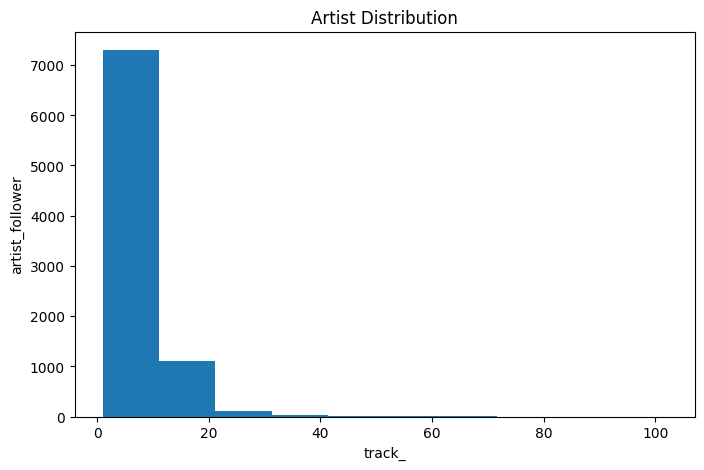

In [53]:
plt.figure(figsize=(8,5))
plt.hist(df['track_number'], bins=10)
plt.xlabel("track_")
plt.ylabel("artist_follower")
plt.title("Artist Distribution")
plt.show()

*Generates histograms to visualize the distribution of track numbers and artist followers. These plots help understand frequency patterns and detect skewness in the data.*

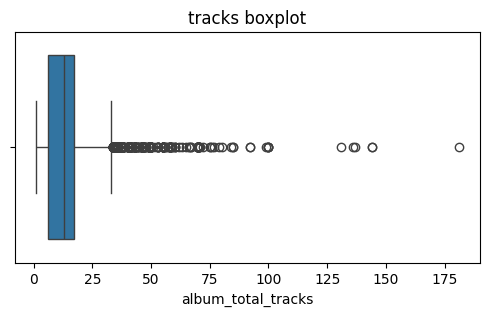

In [54]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['album_total_tracks'])
plt.title("tracks boxplot")
plt.show()

*Creates a boxplot to show the spread and outliers in album track counts. Boxplots are useful for identifying extreme values and understanding data variability*

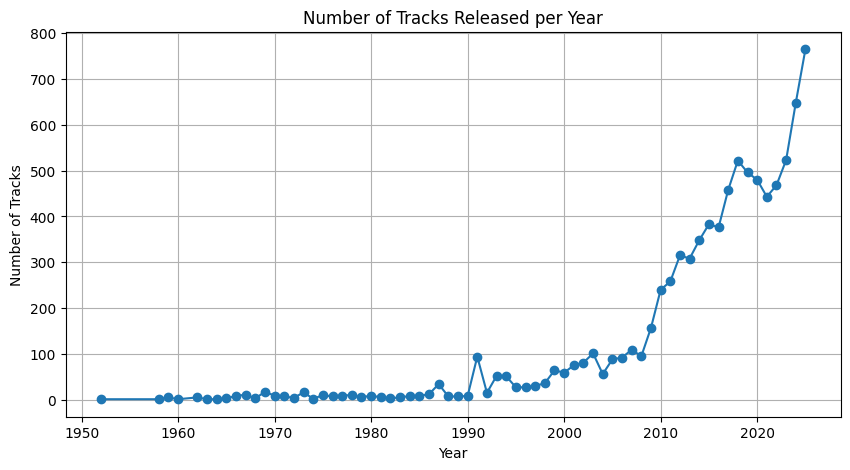

In [55]:

df['album_release_year'] = pd.to_datetime(df['album_release_date']).dt.year

tracks_per_year = df.groupby('album_release_year')['track_id'].count()

plt.figure(figsize=(10,5))
plt.plot(tracks_per_year.index, tracks_per_year.values, marker="o")
plt.title("Number of Tracks Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Tracks")
plt.grid(True)
plt.show()

*This code converts album release dates into year format and plots the number of tracks released each year. It helps identify music release trends over time and highlights peak activity periods.*

In [56]:
track_popularity_avg = df.groupby('track_id')['track_popularity'].mean().sort_values(ascending=False)
display(track_popularity_avg.head(10))

,track_popularity
track_id,
1CPZ5BxNNd0n0nF4Orb9JS,99.0
3yWuTOYDztXjZxdE2cIRUa,97.0
1jgTiNob5cVyXeJ3WgX5bL,95.0
1qbmS6ep2hbBRaEZFpn7BX,95.0
02sy7FAs8dkDNYsHp4Ul3f,94.0
6dOtVTDdiauQNBQEDOtlAB,94.0
03bTIHJElXZ0O0jqOQvAbY,94.0
2x3mwb96B6TquRqMtbxUE1,93.0
1I37Zz2g3hk9eWxaNkj031,93.0


*Calculates the average popularity for each track and displays the top 10 most popular ones. This helps identify the highest-performing tracks based on listener engagement.*

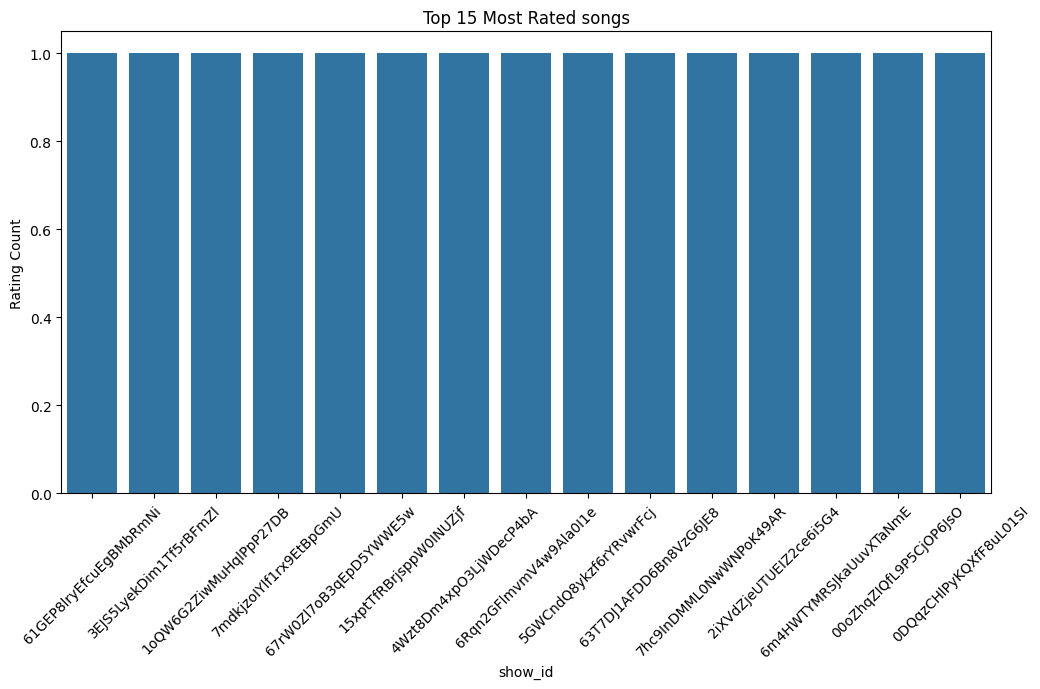

In [57]:
top_tracks = df['track_id'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_tracks.index.astype(str), y=top_tracks.values)
plt.xticks(rotation=45)
plt.title("Top 15 Most Rated songs")
plt.xlabel( "show_id")
plt.ylabel("Rating Count")
plt.show()

*Finds the 15 most frequently occurring tracks and visualizes them using a bar chart. This allows quick comparison of which tracks appear most often in the dataset.*

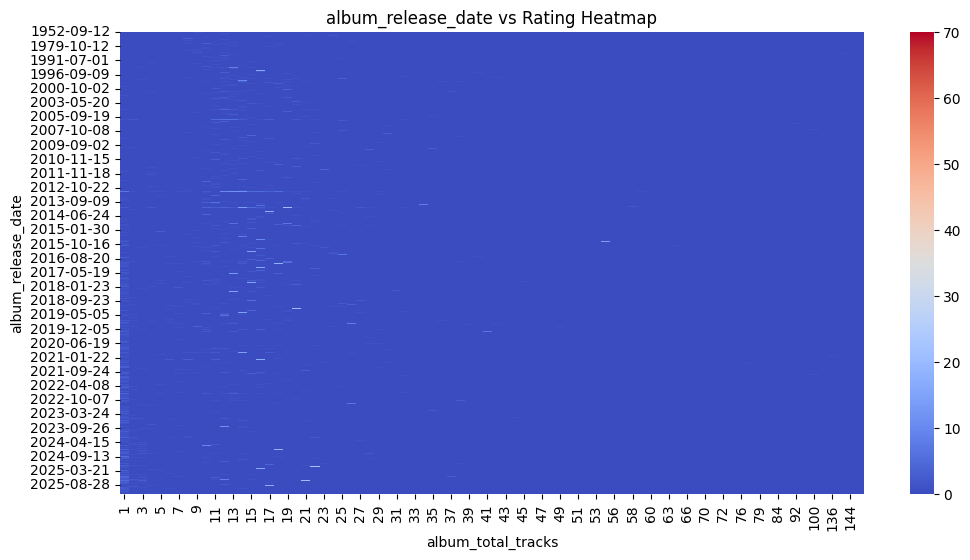

In [58]:
pivot = df.pivot_table(index='album_release_date', columns='album_total_tracks', values='album_id', aggfunc='count', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="coolwarm")
plt.title("album_release_date vs Rating Heatmap")
plt.show()

*Creates a pivot table and heatmap to visualize how track popularity varies across release dates. Heatmaps help detect patterns, clusters, and correlations in large datasets.*

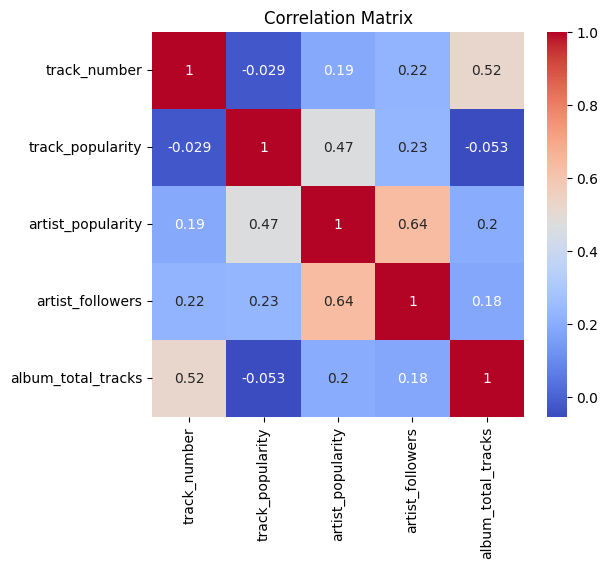

In [59]:
numerics = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(6,5))
sns.heatmap(numerics.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

*Computes correlations between all numerical features and displays them in a heatmap. This analysis helps identify strong relationships and dependencies between different variables.*